In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import module
import module_glassoL2
from module_glassoL2 import *
import importlib
importlib.reload(module_glassoL2)
import readpng as rpng
import colorvector

In [2]:
img=rpng.get_img("./car.png")

In [3]:
np.shape(img)

(366, 408, 3)

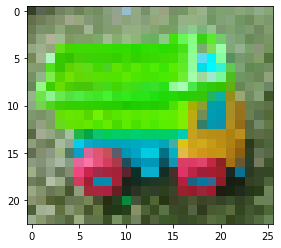

In [4]:
fig=plt.figure()

#timg=img[100:175,100:250]
#timg=img[100:175:2,100:250:2]
timg=img[::16,::16,:]
plt.imshow(timg)

In [5]:
Nx, Ny, Nrgb = np.shape(timg)
N_data = 100
rand_now = module.random_generator(N_data, Nx, Ny)
dRGB, g=rand_now.make_colordata(timg,20) 
g=np.array(g)

In [6]:
rgbvec=colorvector.generate_palette(8)

In [7]:
Npal=np.shape(rgbvec)[0]
print(Npal)

100


In [8]:
I_init=np.ones((Nx,Ny,Npal))
gall=np.einsum("ijk,cl->ijkcl",g,rgbvec)
 #ijkcl


In [9]:
print(np.shape(g),np.shape(dRGB),np.shape(rgbvec),np.shape(gall),np.shape(I_init)) #(i, j, k), (i, l), (c, l),(ijkcl),(jkc)

(100, 23, 26) (100, 3) (100, 3) (100, 23, 26, 100, 3) (23, 26, 100)


In [66]:
yR = mfista_func(I_init, dRGB, gall, lambda_gl= 1e-4, lambda_tik =1e0, print_func=True)


Current iteration: 0/10000,  L: 1718719.477012, cost: 51542011944.215622, cost_chiquare:98836473.593249


KeyboardInterrupt: 

In [61]:
np.shape(yR)

(23, 26, 100)

In [62]:
crit=1.e-2
mask=np.sum(yR[:,:,:],axis=(0,1))>crit
ysel=yR[:,:,mask]
print(np.shape(yR),np.shape(ysel))
for i in range(0,np.shape(yR)[2]):
    print(np.sum(yR[:,:,i]),np.std(yR[:,:,i]))

#y=np.array([yR.T,yG.T,yB.T]).T
#np.shape(y)

(23, 26, 100) (23, 26, 54)
157.348198492 0.00992044517222
116.881113214 0.0097839216265
114.56800118 0.00874713105312
86.5269877318 0.00969334647626
61.7830380257 0.00820116916633
82.0235709397 0.0077328762006
62.3898780149 0.00960776247815
27.1354017725 0.00785465514181
24.8145085653 0.00684131463034
55.7805367867 0.00688630360819
44.0249772686 0.00952322325828
3.09184069094 0.0076033654142
-12.5745276211 0.00617925972977
-1.44538075404 0.00574074211295
35.3917878186 0.00629335743709
31.5384896254 0.00944074436837
-12.6394276405 0.00742388646731
-36.6815596498 0.00569621980183
-38.9465857268 0.00477964739988
-19.2800853024 0.00503247383604
20.9746157293 0.006056499548
25.2074420001 0.00936299195604
-20.783083597 0.00730545887161
-50.2655150959 0.00538035095379
-61.7584493233 0.00402873501336
-54.6855560318 0.00388901015165
-29.401503555 0.00487308807674
12.8227834738 0.00623752712989
25.3964428029 0.00929360404806
-21.4498154219 0.0072492896631
-54.4838385061 0.00523554595802
-72.4331

In [63]:
ypredrgb=np.einsum("cl,jkc->jkl",rgbvec[mask,:],ysel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


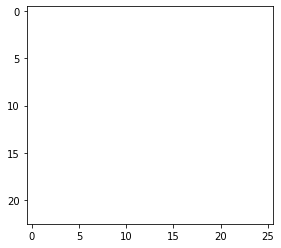

In [64]:
plt.imshow(ypredrgb)

In [65]:
np.shape(timg)

(23, 26, 3)

install colour package
pip install colour-science

In [57]:
import colour 
from colour.plotting import *
import itertools

In [58]:
#line = np.linspace(0.0, 1.0, 15, endpoint=True)
#rgb = np.array(list(itertools.product(line,line,line)), dtype=np.float)


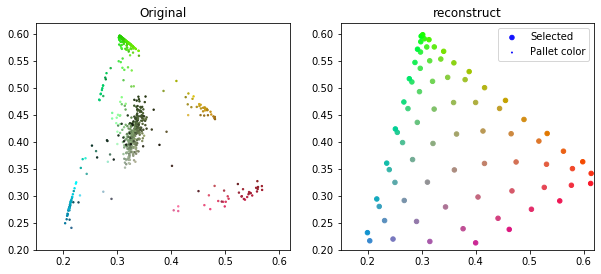

In [59]:
#XYZからxyへ変換
ti=timg.reshape(np.shape(timg)[0]*np.shape(timg)[1],3)
XYZ = colour.sRGB_to_XYZ(ti)
xy = colour.XYZ_to_xy(XYZ)

#CIE_1931_chromaticity_diagram_colours_plot(bounding_box=(-0.1, 0.9, -0.1, 0.9), standalone=False)
#plot_chromaticity_diagram_CIE1931(bounding_box=(0.15, 0.65, 0.15, 0.65), standalone=False)
#sRGB領域へプロット
#plt.plot(xy[:,0], xy[:,1], 'o', markersize=2, label="sRGB",color="gray",alpha=0.2)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=ti,alpha=1,s=2)
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("Original")
#plt.legend() 

yi=rgbvec[mask,:]
XYZ = colour.sRGB_to_XYZ(yi)
xy = colour.XYZ_to_xy(XYZ)
yi[yi>1]=1.0
yi[yi<0]=0


yic=rgbvec[:,:]
XYZc = colour.sRGB_to_XYZ(yic)
xyc = colour.XYZ_to_xy(XYZc)
yic[yic>1]=1.0
yic[yic<0]=0

ax=fig.add_subplot(122,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=yi,alpha=1,s=20,label="Selected")
ax.scatter(xyc[:,0], xyc[:,1],facecolors=yic,alpha=1,s=1,label="Pallet color")
plt.legend()
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("reconstruct")
display(standalone=True)